In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-04-29 12:33:54.223440: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-29 12:33:54.223567: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-29 12:33:54.352362: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [6]:
# data augmentation for the training variable
train_datagen = ImageDataGenerator(rescale =1./255,zoom_range=0.2,horizontal_flip = True)


# data augmentation for the testing and validation variable
val_datagen = ImageDataGenerator(rescale =1./255)
test_datagen = ImageDataGenerator(rescale =1./255)

In [7]:

import pathlib
import numpy as np
data_dir = pathlib.Path("/kaggle/input/chest-xray-pneumonia/train") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

[]


In [8]:
!ls /kaggle/input/chest-xray-pneumonia/chest_xray/train

NORMAL	PNEUMONIA


In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_class,target_dir = "/kaggle/input/chest-xray-pneumonia/chest_xray/train/"):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image
  print(f"Image name = {random_image[0]}")

  return img

Image shape: (1746, 2164)
Image name = IM-0191-0001.jpeg


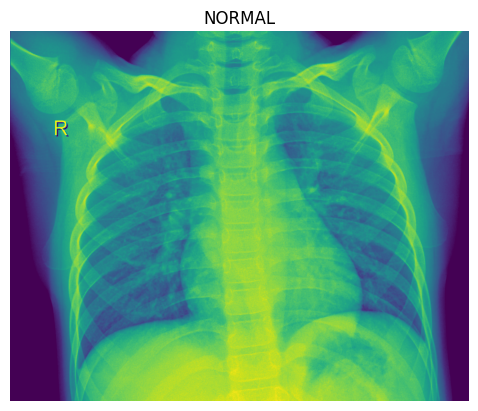

In [10]:
img = view_random_image("NORMAL")

Image shape: (1302, 1512)
Image name = IM-0620-0001-0002.jpeg


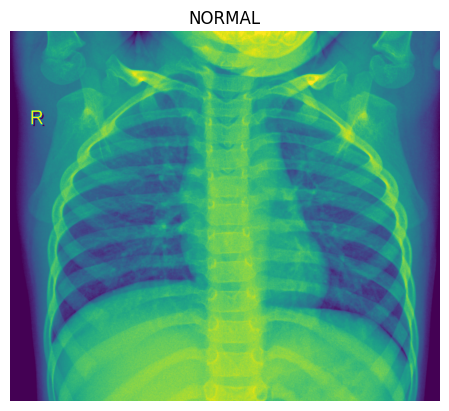

In [11]:
img = view_random_image("NORMAL")

Image shape: (904, 1264)
Image name = person161_virus_317.jpeg


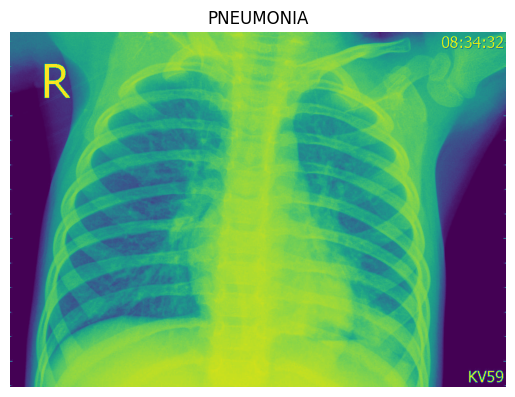

In [12]:
img = view_random_image("PNEUMONIA")

Image shape: (632, 1016)
Image name = person567_bacteria_2353.jpeg


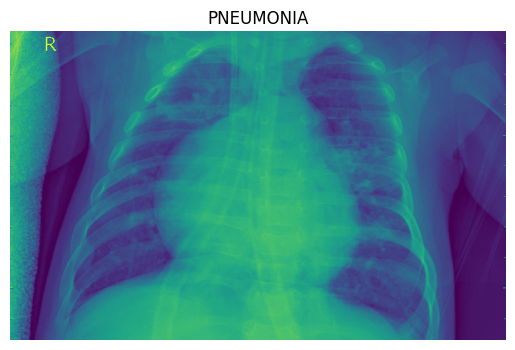

In [13]:
img = view_random_image("PNEUMONIA")

Image shape: (1052, 1526)
Image name = person55_bacteria_265.jpeg


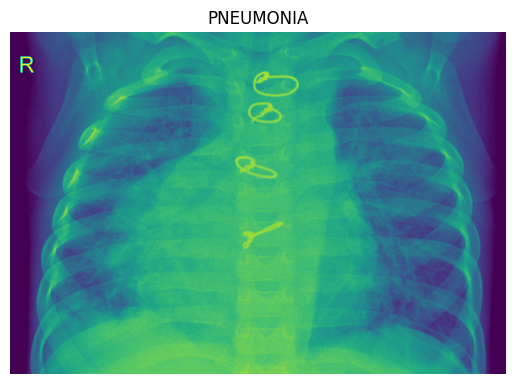

In [14]:
img = view_random_image("PNEUMONIA")

In [15]:
path_file = "/kaggle/input/chest-xray-pneumonia/chest_xray"
train_dir = path_file+"/train/"
val_dir = path_file+"/val/"
test_dir = path_file+"/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

val_data = val_datagen.flow_from_directory(val_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

test_data = test_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model_1 = Sequential([
  Conv2D(100, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(50, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(20, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
model_1.fit(train_data, # now the augmented data is shuffled
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=val_data,
                        validation_steps=len(val_data))



/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/5


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  1/163 ━━━━━━━━━━━━━━━━━━━━ 40:36 15s/step - accuracy: 0.5938 - loss: 0.6889

I0000 00:00:1714394067.287530     160 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


163/163 ━━━━━━━━━━━━━━━━━━━━ 132s 723ms/step - accuracy: 0.7458 - loss: 0.5192 - val_accuracy: 0.8750 - val_loss: 0.4515
Epoch 2/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 83us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/5


/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


163/163 ━━━━━━━━━━━━━━━━━━━━ 89s 522ms/step - accuracy: 0.8838 - loss: 0.2952 - val_accuracy: 0.8750 - val_loss: 0.4552
Epoch 4/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 59us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 89s 524ms/step - accuracy: 0.8589 - loss: 0.3497 - val_accuracy: 0.6250 - val_loss: 0.9229


In [17]:
model_1.evaluate(test_data)

20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 353ms/step - accuracy: 0.7417 - loss: 0.6316


[0.641396701335907, 0.7467948794364929]

In [18]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 100)  │         2,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 100)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 50)   │        45,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 50)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 20)     │         9,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 20)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 13520)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        13,521 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 211,175 (824.91 KB)

 Trainable params: 70,391 (274.96 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 140,784 (549.94 KB)

**AUGEMNETED DATA**

In [19]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

In [20]:
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False)

Found 5216 images belonging to 2 classes.


In [21]:
'''images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Note: labels aren't augmented, they stay the same
# Show original image and augmented image
random_number = random.randint(0, 31) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);'''

'images, labels = train_data.next()\naugmented_images, augmented_labels = train_data_augmented.next() # Note: labels aren\'t augmented, they stay the same\n# Show original image and augmented image\nrandom_number = random.randint(0, 31) # we\'re making batches of size 32, so we\'ll get a random instance\nplt.imshow(images[random_number])\nplt.title(f"Original image")\nplt.axis(False)\nplt.figure()\nplt.imshow(augmented_images[random_number])\nplt.title(f"Augmented image")\nplt.axis(False);'

In [22]:
'''images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Note: labels aren't augmented, they stay the same
# Show original image and augmented image
random_number = random.randint(0, 31) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);'''

'images, labels = train_data.next()\naugmented_images, augmented_labels = train_data_augmented.next() # Note: labels aren\'t augmented, they stay the same\n# Show original image and augmented image\nrandom_number = random.randint(0, 31) # we\'re making batches of size 32, so we\'ll get a random instance\nplt.imshow(images[random_number])\nplt.title(f"Original image")\nplt.axis(False)\nplt.figure()\nplt.imshow(augmented_images[random_number])\nplt.title(f"Augmented image")\nplt.axis(False);'

In [23]:
model_2 = Sequential([
  Conv2D(100, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(50, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(20, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
model_2.fit(train_data_augmented, # now the augmented data is shuffled
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=val_data,
                        validation_steps=len(val_data))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 93s 537ms/step - accuracy: 0.6483 - loss: 1.5109 - val_accuracy: 0.5000 - val_loss: 5.0051
Epoch 2/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 87us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 141s 537ms/step - accuracy: 0.5870 - loss: 2.4322 - val_accuracy: 0.5625 - val_loss: 1.3712
Epoch 4/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 55us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 91s 533ms/step - accuracy: 0.7158 - loss: 1.3624 - val_accuracy: 0.5625 - val_loss: 0.8133


In [24]:
model_2.evaluate(test_data)

20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 224ms/step - accuracy: 0.6452 - loss: 0.7000


[0.6956871151924133, 0.6458333134651184]